In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.unicode_minus'] = False

데이터 수집처 : https://www.blockchain.com/ko/charts/market-price?time=60days

### 시간 정보가 포함된 데이터 살펴보기 (시계열 데이터)

In [2]:
bitcoin_df = pd.read_csv('data10/market-price.csv')
bitcoin_df.columns = ['day','price']
bitcoin_df.head()

,day,price
0,2020-03-17 00:00:00,5026.35
1,2020-03-18 00:00:00,5357.61
2,2020-03-19 00:00:00,5410.23
3,2020-03-20 00:00:00,6195.20
4,2020-03-21 00:00:00,6226.44


In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
bitcoin_df['price'].describe()

count      361.000000
mean     17609.568864
std      13180.927652
min       5026.350000
25%       9303.590000
50%      11337.400000
75%      19276.590000
max      57764.000000
Name: price, dtype: float64

### 시계열 데이터 살펴보기

In [5]:
# object 타입의 day 컬럼을 datetime으로 변경한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
# day 컬럼을 인덱스로 설정한다.
bitcoin_df.set_index('day', inplace=True)
bitcoin_df

,price
day,
2020-03-17,5026.35
2020-03-18,5357.61
2020-03-19,5410.23
2020-03-20,6195.20
2020-03-21,6226.44
...,...
2021-03-08,51169.70
2021-03-09,52299.33
2021-03-10,54881.52


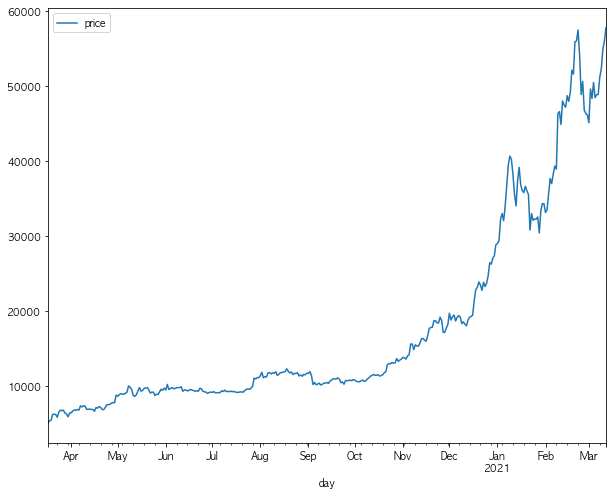

In [7]:
# 일자별 비트코인 시세를 시각화한다.
bitcoin_df.plot()
plt.show()

### 시세 예측 - ARIMA 모델 적용

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [9]:
model = ARIMA(bitcoin_df['price'].values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp =True)
model_fit.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2995.644
Method:                       css-mle   S.D. of innovations            992.014
Date:                Wed, 17 Mar 2021   AIC                           6003.289
Time:                        15:24:07   BIC                           6026.605
Sample:                             1   HQIC                          6012.560
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.5462     54.017      2.713      0.007      40.675     252.418
ar.L1.D.y     -0.4575      0.032    -14.232      0.000      -0.521      -0.395
ar.L2.D.y     -0.8872      0.040    -21.933      0.000      -0.966      -0.808
ma.L1.D.y      0.4397      0.013     33.177      0.000       0.414       0.466
ma.L2.D.y      0.9830      0.029     34.431      0.000       0.927       1.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2578           -1.0299j            1.0617           -0.2890
AR.2           -0.2578           +1.0299j            1.0617            0.2890
MA.1           -0.2236           -0.9835j            1.0086           -0.2856
MA.2           -0.2236           +0.9835j            1.0086            0.2856
-----------------------------------------------------------------------------
"""

### 모델 성능과 예측 결과 시각화

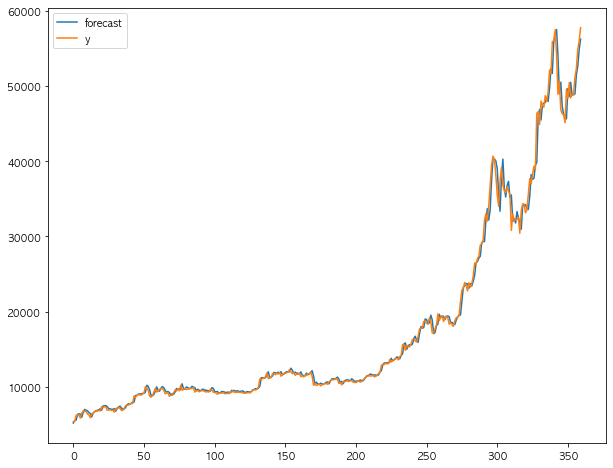

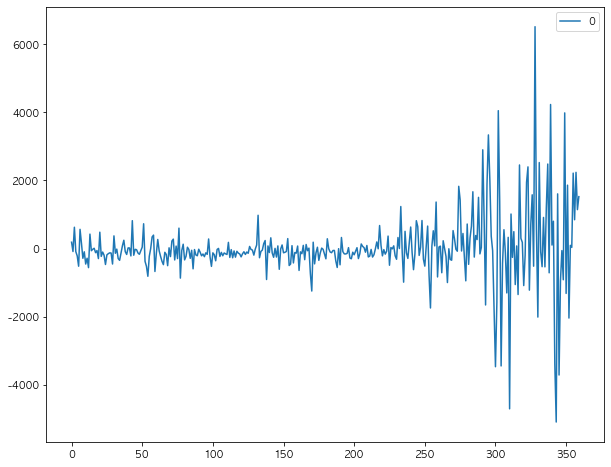

In [10]:
# 학습데이터에 대한 예측 결과
fig = model_fit.plot_predict()

# 변동폭 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

### 데이터 예측

In [11]:
# 학습 데이터 이후 5일치를 예측한다.
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([58101.45903598, 58220.596524  , 58210.30488322, 58452.92558892,
        58694.66208288]),
 array([ 992.01430852, 1390.44033417, 1759.05842952, 2046.55601084,
        2264.2998169 ]),
 array([[56157.14671914, 60045.77135283],
        [55495.38354637, 60945.80950163],
        [54762.61371464, 61657.99605179],
        [54441.74951533, 62464.10166252],
        [54256.71599156, 63132.60817421]]))

In [12]:
# 테스트 데이터를 불러온다.
bitcon_test_df = pd.read_csv('data10/market-price-test.csv')
bitcon_test_df.columns = ['day', 'price']
bitcon_test_df

,day,price
0,2021-03-13 00:00:00,57253.28
1,2021-03-14 00:00:00,61258.73
2,2021-03-15 00:00:00,59133.47
3,2021-03-16 00:00:00,55754.72
4,2021-03-17 00:00:00,56872.38


In [13]:
# 예측결과 추출
pred_y = forecast_data[0].tolist()

# 진짜결과 추출
test_y = bitcon_test_df['price'].values

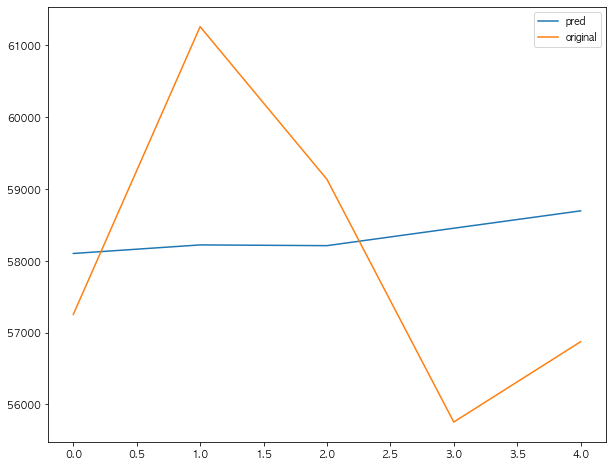

In [14]:
plt.plot(pred_y, label='pred')
plt.plot(test_y, label='original')

plt.legend()
plt.show()

### Facebook Prophet 사용
- pip install convertdate
- conda install -c conda-forge fbprophet

In [15]:
from fbprophet import Prophet

In [16]:
# prophet을 사용하기 위해서는 날짜는 ds, 결과는 y로 설정해야한다.
bitcoin_df = pd.read_csv('data10/market-price.csv')
bitcoin_df.columns=['ds','y']

In [18]:
# prophet 생성
# seasonlity_mode : 트랜드 분석 방식을 설정
    # multiplicative를 주면 다양한 기준으로 분석을 하게 된다.
# yearly_seasonality : 연간 트랜드
# weekly_seasonality : 주간 트랜드
# daily_seasonality : 일단 트랜드
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

### 모델로부터 예측할 기간을 정의하고, 결과를 도출

In [23]:
# 5일을 내다보며 예측한다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-03-17,1282.901718,4233.005314,6549.177754,1282.901718,1282.901718,3.975346,3.975346,3.975346,3.199943,...,0.022792,0.022792,0.022792,-0.798196,-0.798196,-0.798196,0.0,0.0,0.0,5388.113585
1,2020-03-18,1263.548168,4289.308045,6571.201415,1263.548168,1263.548168,3.975346,3.975346,3.975346,3.340055,...,-0.020773,-0.020773,-0.020773,-0.614518,-0.614518,-0.614518,0.0,0.0,0.0,5483.868283
2,2020-03-19,1244.194618,4497.774502,6821.106425,1244.194618,1244.194618,3.975346,3.975346,3.975346,3.571809,...,0.024833,0.024833,0.024833,-0.428370,-0.428370,-0.428370,0.0,0.0,0.0,5688.219866
3,2020-03-20,1224.841069,4592.173641,6960.190430,1224.841069,1224.841069,3.975346,3.975346,3.975346,3.709248,...,-0.023564,-0.023564,-0.023564,-0.242535,-0.242535,-0.242535,0.0,0.0,0.0,5768.079784
4,2020-03-21,1205.487519,4823.524323,7053.561365,1205.487519,1205.487519,3.975346,3.975346,3.975346,3.926958,...,0.011391,0.011391,0.011391,-0.059779,-0.059779,-0.059779,0.0,0.0,0.0,5939.386484


In [21]:
# 예측 결과
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
361,2021-03-13,17670.139790,60593.600944,62903.471799,17670.139790,17670.139790,3.975346,3.975346,3.975346,2.496584,...,0.011391,0.011391,0.011391,-1.490154,-1.490154,-1.490154,0.0,0.0,0.0,61785.122203
362,2021-03-14,17842.163632,63531.055383,65861.738018,17842.163632,17842.163632,3.975346,3.975346,3.975346,2.627674,...,-0.001843,-0.001843,-0.001843,-1.345829,-1.345829,-1.345829,0.0,0.0,0.0,64725.548128
363,2021-03-15,18014.187474,66837.824195,69152.778161,18010.672937,18014.187474,3.975346,3.975346,3.975346,2.774072,...,-0.012837,-0.012837,-0.012837,-1.188437,-1.188437,-1.188437,0.0,0.0,0.0,67986.847719
364,2021-03-16,18186.211315,71163.248133,73482.765578,18175.750271,18189.857104,3.975346,3.975346,3.975346,2.977980,...,0.022792,0.022792,0.022792,-1.020158,-1.020158,-1.020158,0.0,0.0,0.0,72344.391929
365,2021-03-17,18358.235157,74302.082156,76606.836199,18335.799494,18367.784057,3.975346,3.975346,3.975346,3.111166,...,-0.020773,-0.020773,-0.020773,-0.843407,-0.843407,-0.843407,0.0,0.0,0.0,75473.757478


In [24]:
# 날짜와 예측 결과
forecast_data[['ds', 'yhat']].tail(5)

,ds,yhat
361,2021-03-13,61785.122203
362,2021-03-14,64725.548128
363,2021-03-15,67986.847719
364,2021-03-16,72344.391929
365,2021-03-17,75473.757478


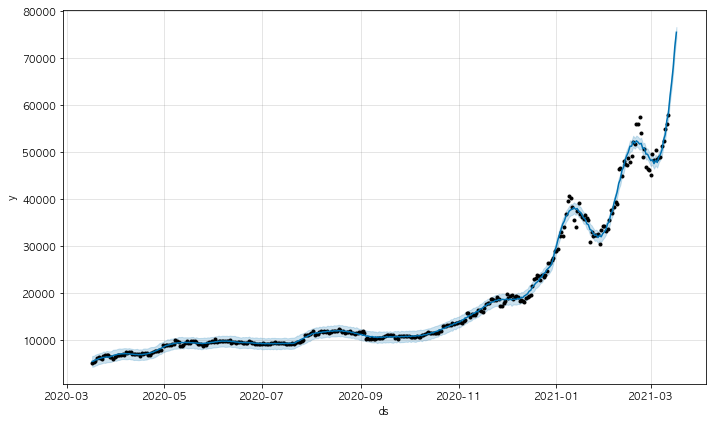

In [25]:
prophet.plot(forecast_data)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


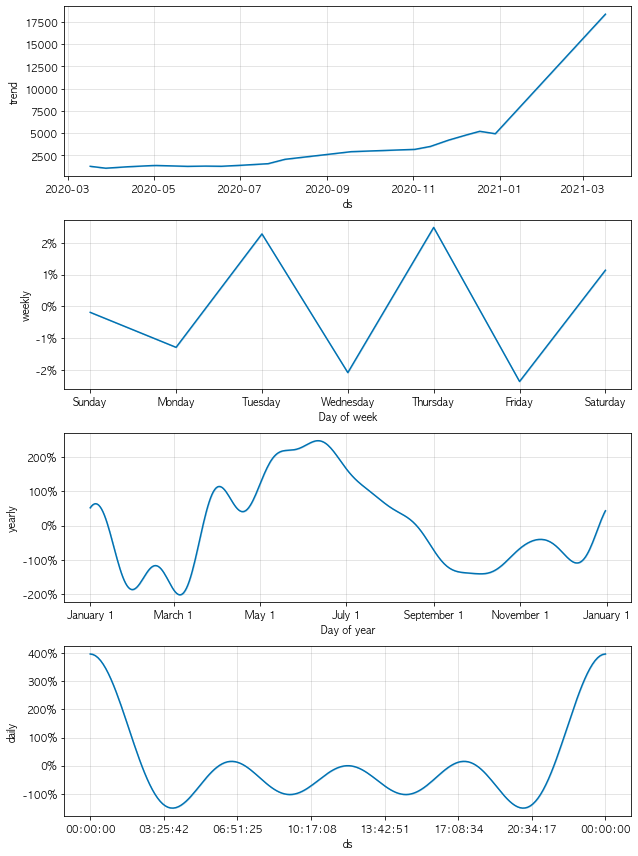

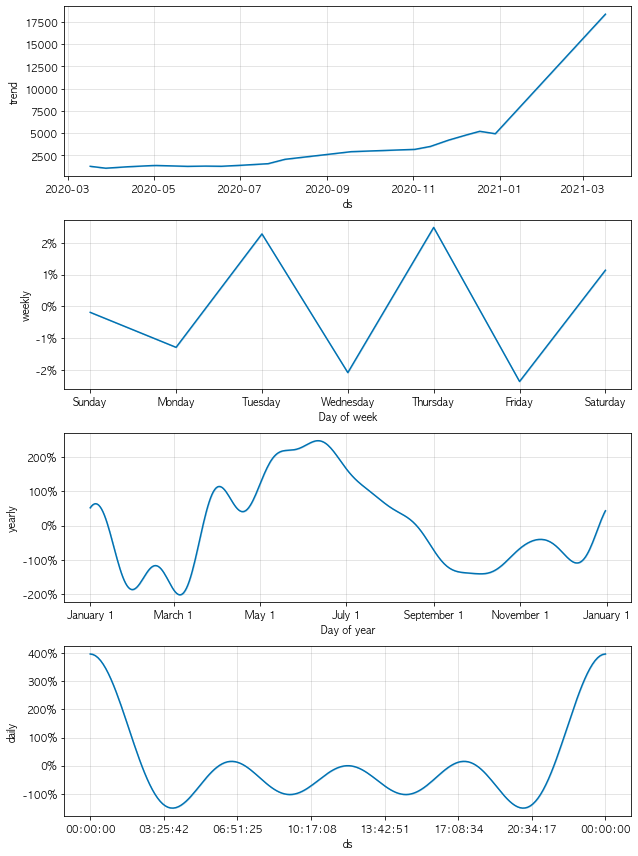

In [26]:
# 기간별 트랜드 분석 시각화
prophet.plot_components(forecast_data)

### 가격 예측

In [27]:
bitcoin_test_df = pd.read_csv('data10/market-price-test.csv')
bitcoin_test_df.columns = ['ds','y']
bitcoin_test_df.head()

,ds,y
0,2021-03-13 00:00:00,57253.28
1,2021-03-14 00:00:00,61258.73
2,2021-03-15 00:00:00,59133.47
3,2021-03-16 00:00:00,55754.72
4,2021-03-17 00:00:00,56872.38


In [29]:
# 예측 결과
pred_y = forecast_data['yhat'].values[-5:]
test_y = bitcoin_test_df['y'].values

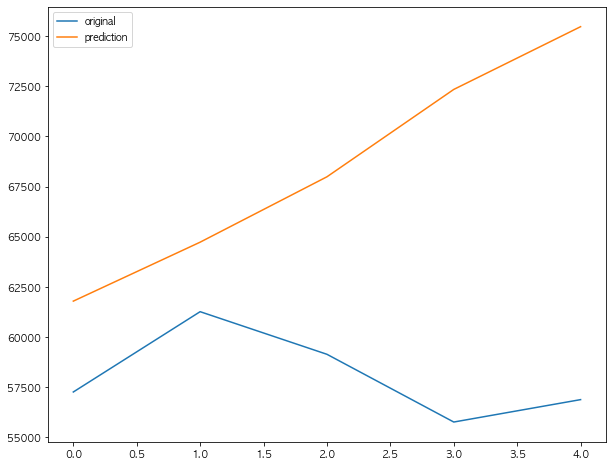

In [30]:
plt.plot(test_y, label='original')
plt.plot(pred_y, label='prediction')
plt.legend()
plt.show()